In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
pag = pd.read_sql("PRAGMA table_info(checker);",con)
pag

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,status,TEXT,0,None,0
2,2,success,INTEGER,0,None,0
3,3,timestamp,TIMESTAMP,0,None,0
4,4,numTrials,INTEGER,0,None,0
5,5,labname,TEXT,0,None,0
6,6,uid,TEXT,0,None,0


In [4]:
checker = pd.read_sql("SELECT * FROM checker WHERE uid LIKE 'user%'",con=con,parse_dates='timestamp')
checker

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [5]:
checker['hour'] = checker['timestamp'].dt.hour
checker['day_of_week'] = checker['timestamp'].dt.day_of_week
checker['day'] =checker['timestamp'].dt.day
checker['type_of_day'] = checker['day_of_week'].apply(lambda x: 'working-day' if x < 5 else 'weekend')
checker

,index,status,success,timestamp,numTrials,labname,uid,hour,day_of_week,day,type_of_day
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,5,4,17,working-day
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,5,4,17,working-day
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,5,4,17,working-day
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,5,4,17,working-day
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,5,4,17,working-day
...,...,...,...,...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1,20,3,21,working-day
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1,20,3,21,working-day
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1,20,3,21,working-day
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1,20,3,21,working-day


In [6]:
checker = checker.drop(columns=checker.columns[0:3])
checker = checker.drop(columns=checker.columns[1:3])
checker

,timestamp,uid,hour,day_of_week,day,type_of_day
0,2020-04-17 05:19:02.744528,user_4,5,4,17,working-day
1,2020-04-17 05:22:35.249331,user_4,5,4,17,working-day
2,2020-04-17 05:22:45.549397,user_4,5,4,17,working-day
3,2020-04-17 05:34:14.691200,user_4,5,4,17,working-day
4,2020-04-17 05:34:24.422370,user_4,5,4,17,working-day
...,...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,user_1,20,3,21,working-day
3203,2020-05-21 20:22:41.785725,user_1,20,3,21,working-day
3204,2020-05-21 20:22:41.877806,user_1,20,3,21,working-day
3205,2020-05-21 20:37:00.129678,user_1,20,3,21,working-day


In [7]:
working = list()
working = checker[checker['type_of_day'] == 'working-day']
working

,timestamp,uid,hour,day_of_week,day,type_of_day
0,2020-04-17 05:19:02.744528,user_4,5,4,17,working-day
1,2020-04-17 05:22:35.249331,user_4,5,4,17,working-day
2,2020-04-17 05:22:45.549397,user_4,5,4,17,working-day
3,2020-04-17 05:34:14.691200,user_4,5,4,17,working-day
4,2020-04-17 05:34:24.422370,user_4,5,4,17,working-day
...,...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,user_1,20,3,21,working-day
3203,2020-05-21 20:22:41.785725,user_1,20,3,21,working-day
3204,2020-05-21 20:22:41.877806,user_1,20,3,21,working-day
3205,2020-05-21 20:37:00.129678,user_1,20,3,21,working-day


In [8]:
weekend = list()
weekend = checker[checker['type_of_day'] == 'weekend']
weekend

,timestamp,uid,hour,day_of_week,day,type_of_day
23,2020-04-18 07:56:45.408648,user_17,7,5,18,weekend
24,2020-04-18 13:36:53.971502,user_30,13,5,18,weekend
25,2020-04-18 13:42:35.482008,user_2,13,5,18,weekend
26,2020-04-18 13:51:22.291271,user_2,13,5,18,weekend
27,2020-04-18 13:53:17.230725,user_2,13,5,18,weekend
...,...,...,...,...,...,...
3088,2020-05-17 22:23:05.744415,user_16,22,6,17,weekend
3089,2020-05-17 22:23:11.078664,user_16,22,6,17,weekend
3090,2020-05-17 22:23:11.220412,user_16,22,6,17,weekend
3091,2020-05-17 22:25:15.051189,user_16,22,6,17,weekend


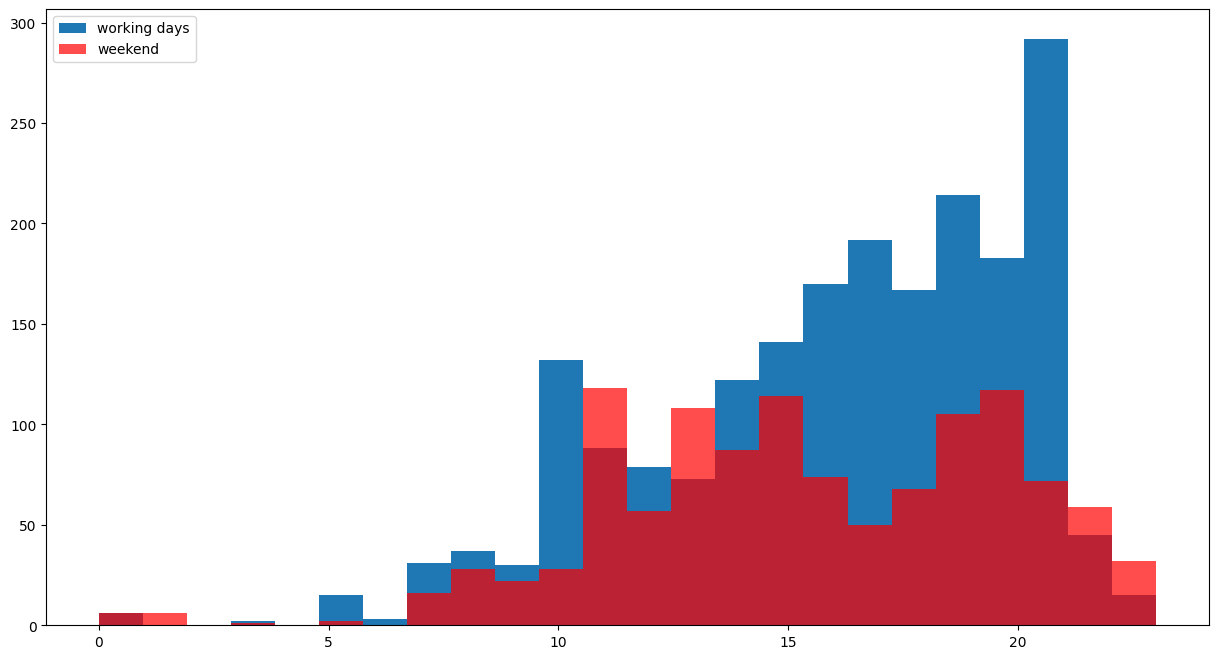

In [9]:
fig,axes = plt.subplots(figsize=(15,8))
axes.hist(working['hour'],bins=24,stacked=True)
axes.hist(weekend['hour'],bins=24,color='red',stacked=True,alpha=0.7)
plt.legend(['working days','weekend'])
plt.show()

Are there hours when the total number of commits was higher on weekends than on working days?

In [10]:
df_day_off = weekend.groupby('hour').count().reset_index()
df_work = working.groupby('hour').count().reset_index()
tot = df_work[df_day_off['uid'] > df_work['uid']]
tot[['hour','uid']].sort_values('uid',ascending=False)

,hour,uid
8,11,88
10,13,73
19,22,45
20,23,15
1,3,2


In [11]:
con.close()